In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

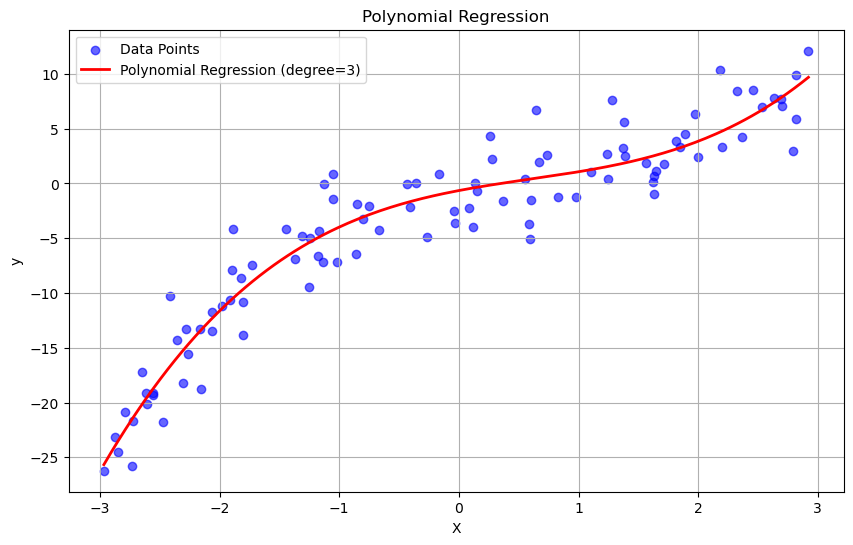

In [2]:

np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**3 - X**2 + 2 * X + np.random.randn(100, 1) * 3

degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data Points", alpha=0.6)
plt.plot(X_plot, y_plot, color="red", label=f"Polynomial Regression (degree={degree})", linewidth=2)
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


In [3]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**3 - X**2 + 2 * X + np.random.randn(100, 1) * 3
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

frames = []
degrees = range(1, 10)

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_plot_poly = poly_features.transform(X_plot)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_plot = model.predict(X_plot_poly)

    frames.append(go.Frame(
        data=[
            go.Scatter(x=X.flatten(), y=y.flatten(), mode="markers", name="Data Points"),
            go.Scatter(x=X_plot.flatten(), y=y_plot.flatten(), mode="lines", name=f"Degree {degree}")
        ],
        name=f"Degree {degree}"
    ))

fig = go.Figure(
    data=[
        go.Scatter(x=X.flatten(), y=y.flatten(), mode="markers", name="Data Points"),
        go.Scatter(x=X_plot.flatten(), y=np.zeros_like(X_plot.flatten()), mode="lines", name="Polynomial Fit"),
    ],
    layout=go.Layout(
        title="Polynomial Regression Animation",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[
            dict(
                type="buttons",
                showactive=True,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)],
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[None, dict(frame=dict(duration=0, redraw=False))],
                    ),
                ],
            )
        ],
    ),
    frames=frames
)

fig.show()


In [4]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**3 - X**2 + 2 * X + np.random.randn(100, 1) * 3

X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

frames = []
degrees = range(1,30)

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_plot_poly = poly_features.transform(X_plot)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_plot = model.predict(X_plot_poly)

    frames.append(go.Frame(
        data=[
            go.Scatter(x=X.flatten(), y=y.flatten(), mode="markers", name="Data Points"),
            go.Scatter(x=X_plot.flatten(), y=y_plot.flatten(), mode="lines", name=f"Degree {degree}")
        ],
        name=f"Degree {degree}"
    ))

fig = go.Figure(
    data=[
        go.Scatter(x=X.flatten(), y=y.flatten(), mode="markers", name="Data Points"),
        go.Scatter(x=X_plot.flatten(), y=np.zeros_like(X_plot.flatten()), mode="lines", name="Polynomial Fit"),
    ],
    layout=go.Layout(
        title="Polynomial Regression Animation",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[
            dict(
                type="buttons",
                showactive=True,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)],
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[None, dict(frame=dict(duration=0, redraw=False))],
                    ),
                ],
            )
        ],
    ),
    frames=frames
)

fig.show()


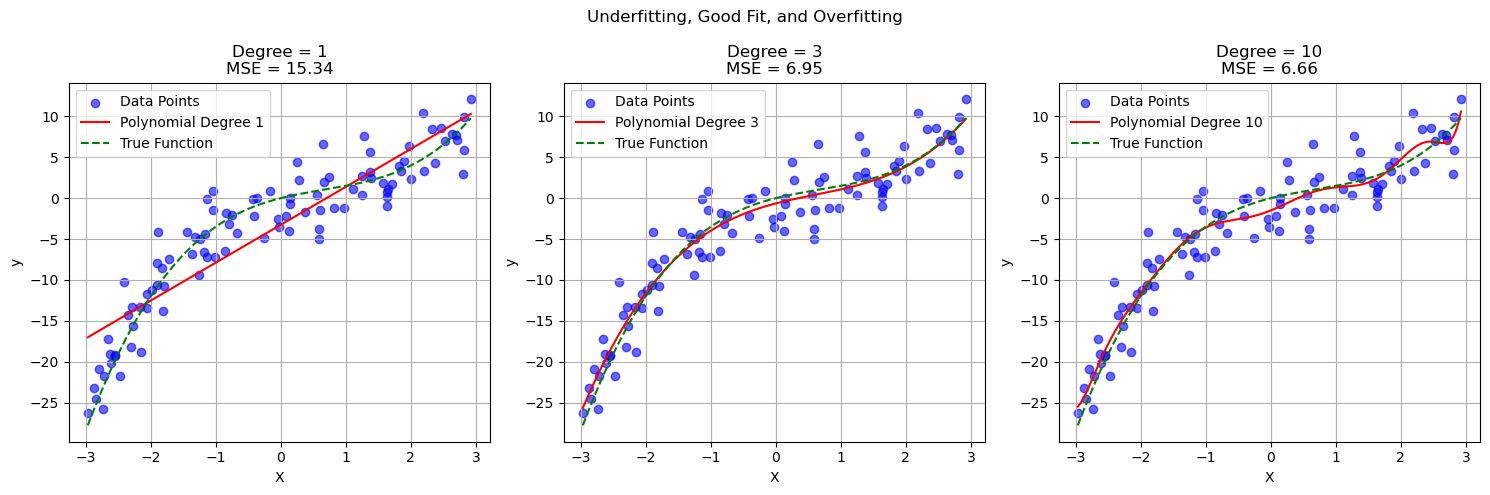

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**3 - X**2 + 2 * X + np.random.randn(100, 1) * 3

X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_true = 0.5 * X_plot**3 - X_plot**2 + 2 * X_plot

degrees = [1, 3, 10]

plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees, 1):

    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_plot_poly = poly_features.transform(X_plot)


    model = LinearRegression()
    model.fit(X_poly, y)
    y_plot = model.predict(X_plot_poly)

    mse = mean_squared_error(y, model.predict(X_poly))

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color="blue", label="Data Points", alpha=0.6)
    plt.plot(X_plot, y_plot, color="red", label=f"Polynomial Degree {degree}")
    plt.plot(X_plot, y_true, color="green", linestyle="--", label="True Function")
    plt.title(f"Degree = {degree}\nMSE = {mse:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()

plt.suptitle("Underfitting, Good Fit, and Overfitting")
plt.tight_layout()
plt.show()


### When increase Degree(n) --> MSE is improved(decrease) 